In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Step 1: Load Dataset

In [6]:
data = pd.read_csv('sales_data_sample.csv', encoding='ISO-8859-1')

### Step 2: Initial Data Exploration

In [8]:
data.info

<bound method DataFrame.info of       ORDERNUMBER  QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER    SALES  \
0           10107               30      95.70                2  2871.00   
1           10121               34      81.35                5  2765.90   
2           10134               41      94.74                2  3884.34   
3           10145               45      83.26                6  3746.70   
4           10159               49     100.00               14  5205.27   
...           ...              ...        ...              ...      ...   
2818        10350               20     100.00               15  2244.40   
2819        10373               29     100.00                1  3978.51   
2820        10386               43     100.00                4  5417.57   
2821        10397               34      62.24                1  2116.16   
2822        10414               47      65.52                9  3079.44   

             ORDERDATE    STATUS  QTR_ID  MONTH_ID  YEAR_ID  ...  \

In [46]:
data.isnull().sum()

ORDERNUMBER          0
QUANTITYORDERED      0
PRICEEACH            0
ORDERLINENUMBER      0
SALES                0
ORDERDATE            0
STATUS               0
QTR_ID               0
MONTH_ID             0
YEAR_ID              0
PRODUCTLINE          0
MSRP                 0
PRODUCTCODE          0
CUSTOMERNAME         0
PHONE                0
ADDRESSLINE1         0
CITY                 0
STATE                0
POSTALCODE          76
COUNTRY              0
TERRITORY            0
CONTACTLASTNAME      0
CONTACTFIRSTNAME     0
DEALSIZE             0
Shipped              0
Disputed             0
In Process           0
Cancelled            0
On Hold              0
Resolved             0
dtype: int64

### Step 3: Data Cleaning - Adding Missing Data 

In [47]:
#adding city as a state value, to such cases as 'new york' etc

In [69]:
data['STATE'] = data['STATE'].fillna(data['CITY'])

In [70]:
data['STATE'].isnull().sum()

0

In [50]:
#figuring out list of uniques countries to get the list of possible missing territories and fill it

In [51]:
unique_countries = data['COUNTRY'].unique()

In [52]:
unique_countries

array(['USA', 'France', 'Norway', 'Australia', 'Finland', 'Austria', 'UK',
       'Spain', 'Sweden', 'Singapore', 'Canada', 'Japan', 'Italy',
       'Denmark', 'Belgium', 'Philippines', 'Germany', 'Switzerland',
       'Ireland'], dtype=object)

In [53]:
unique_territories = data['TERRITORY'].unique()
unique_territories

array(['AMER', 'EMEA', 'APAC', 'Japan'], dtype=object)

In [67]:
data.loc[data['COUNTRY'] == 'France', 'TERRITORY'] = 'EMEA'
data.loc[data['COUNTRY'] == 'Germany', 'TERRITORY'] = 'EMEA'
data.loc[data['COUNTRY'] == 'Norway', 'TERRITORY'] = 'EMEA'
data.loc[data['COUNTRY'] == 'Finland', 'TERRITORY'] = 'EMEA'
data.loc[data['COUNTRY'] == 'Austria', 'TERRITORY'] = 'EMEA'
data.loc[data['COUNTRY'] == 'UK', 'TERRITORY'] = 'EMEA'
data.loc[data['COUNTRY'] == 'Spain', 'TERRITORY'] = 'EMEA'
data.loc[data['COUNTRY'] == 'Sweden', 'TERRITORY'] = 'EMEA'
data.loc[data['COUNTRY'] == 'Italy', 'TERRITORY'] = 'EMEA'
data.loc[data['COUNTRY'] == 'Denmark', 'TERRITORY'] = 'EMEA'
data.loc[data['COUNTRY'] == 'Belgium', 'TERRITORY'] = 'EMEA'
data.loc[data['COUNTRY'] == 'Switzerland', 'TERRITORY'] = 'EMEA'
data.loc[data['COUNTRY'] == 'Ireland', 'TERRITORY'] = 'EMEA'
data.loc[data['COUNTRY'] == 'USA', 'TERRITORY'] = 'AMER'
data.loc[data['COUNTRY'] == 'Australia', 'TERRITORY'] = 'APAC'
data.loc[data['COUNTRY'] == 'Philippines', 'TERRITORY'] = 'APAC'
data.loc[data['COUNTRY'] == 'Singapore', 'TERRITORY'] = 'APAC'
data.loc[data['COUNTRY'] == 'Canada', 'TERRITORY'] = 'AMER'

In [55]:
data.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE,Shipped,Disputed,In Process,Cancelled,On Hold,Resolved
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Cancelled,1,2,2003,...,AMER,Yu,Kwai,Small,Cancelled,Cancelled,Cancelled,Cancelled,Cancelled,Cancelled
1,10121,34,81.35,5,2765.90,05.07.2003 00:00,Cancelled,2,5,2003,...,EMEA,Henriot,Paul,Small,Cancelled,Cancelled,Cancelled,Cancelled,Cancelled,Cancelled
2,10134,41,94.74,2,3884.34,07.01.2003 00:00,Cancelled,3,7,2003,...,EMEA,Da Cunha,Daniel,Medium,Cancelled,Cancelled,Cancelled,Cancelled,Cancelled,Cancelled
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Cancelled,3,8,2003,...,AMER,Young,Julie,Medium,Cancelled,Cancelled,Cancelled,Cancelled,Cancelled,Cancelled
4,10159,49,100.00,14,5205.27,10.10.2003 00:00,Cancelled,4,10,2003,...,AMER,Brown,Julie,Medium,Cancelled,Cancelled,Cancelled,Cancelled,Cancelled,Cancelled


In [56]:
data.isnull().sum()

ORDERNUMBER          0
QUANTITYORDERED      0
PRICEEACH            0
ORDERLINENUMBER      0
SALES                0
ORDERDATE            0
STATUS               0
QTR_ID               0
MONTH_ID             0
YEAR_ID              0
PRODUCTLINE          0
MSRP                 0
PRODUCTCODE          0
CUSTOMERNAME         0
PHONE                0
ADDRESSLINE1         0
CITY                 0
STATE                0
POSTALCODE          76
COUNTRY              0
TERRITORY            0
CONTACTLASTNAME      0
CONTACTFIRSTNAME     0
DEALSIZE             0
Shipped              0
Disputed             0
In Process           0
Cancelled            0
On Hold              0
Resolved             0
dtype: int64

In [57]:
data['TERRITORY'].unique()

array(['AMER', 'EMEA', 'APAC', 'Japan'], dtype=object)

In [58]:
data.describe()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,QTR_ID,MONTH_ID,YEAR_ID,MSRP
count,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.00000,2823.000000
mean,10258.725115,35.092809,83.658544,6.466171,3553.889072,2.717676,7.092455,2003.81509,100.715551
std,92.085478,9.741443,20.174277,4.225841,1841.865106,1.203878,3.656633,0.69967,40.187912
min,10100.000000,6.000000,26.880000,1.000000,482.130000,1.000000,1.000000,2003.00000,33.000000
25%,10180.000000,27.000000,68.860000,3.000000,2203.430000,2.000000,4.000000,2003.00000,68.000000
50%,10262.000000,35.000000,95.700000,6.000000,3184.800000,3.000000,8.000000,2004.00000,99.000000
75%,10333.500000,43.000000,100.000000,9.000000,4508.000000,4.000000,11.000000,2004.00000,124.000000
max,10425.000000,97.000000,100.000000,18.000000,14082.800000,4.000000,12.000000,2005.00000,214.000000


In [59]:
data['STATUS'].value_counts()

STATUS
Cancelled    2823
Name: count, dtype: int64

### Step 4. Exploring the data, getting the basic understanding

In [60]:
data

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE,Shipped,Disputed,In Process,Cancelled,On Hold,Resolved
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Cancelled,1,2,2003,...,AMER,Yu,Kwai,Small,Cancelled,Cancelled,Cancelled,Cancelled,Cancelled,Cancelled
1,10121,34,81.35,5,2765.90,05.07.2003 00:00,Cancelled,2,5,2003,...,EMEA,Henriot,Paul,Small,Cancelled,Cancelled,Cancelled,Cancelled,Cancelled,Cancelled
2,10134,41,94.74,2,3884.34,07.01.2003 00:00,Cancelled,3,7,2003,...,EMEA,Da Cunha,Daniel,Medium,Cancelled,Cancelled,Cancelled,Cancelled,Cancelled,Cancelled
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Cancelled,3,8,2003,...,AMER,Young,Julie,Medium,Cancelled,Cancelled,Cancelled,Cancelled,Cancelled,Cancelled
4,10159,49,100.00,14,5205.27,10.10.2003 00:00,Cancelled,4,10,2003,...,AMER,Brown,Julie,Medium,Cancelled,Cancelled,Cancelled,Cancelled,Cancelled,Cancelled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818,10350,20,100.00,15,2244.40,12.02.2004 00:00,Cancelled,4,12,2004,...,EMEA,Freyre,Diego,Small,Cancelled,Cancelled,Cancelled,Cancelled,Cancelled,Cancelled
2819,10373,29,100.00,1,3978.51,1/31/2005 0:00,Cancelled,1,1,2005,...,EMEA,Koskitalo,Pirkko,Medium,Cancelled,Cancelled,Cancelled,Cancelled,Cancelled,Cancelled
2820,10386,43,100.00,4,5417.57,03.01.2005 00:00,Cancelled,1,3,2005,...,EMEA,Freyre,Diego,Medium,Cancelled,Cancelled,Cancelled,Cancelled,Cancelled,Cancelled
2821,10397,34,62.24,1,2116.16,3/28/2005 0:00,Cancelled,1,3,2005,...,EMEA,Roulet,Annette,Small,Cancelled,Cancelled,Cancelled,Cancelled,Cancelled,Cancelled


In [61]:
fixed_data = data = pd.read_csv('sales_data_sample.csv', encoding='ISO-8859-1')

In [62]:
fixed_data.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,05.07.2003 00:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,07.01.2003 00:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10.10.2003 00:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [63]:
data['STATUS'] = fixed_data['STATUS']

In [64]:
data.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,05.07.2003 00:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,07.01.2003 00:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10.10.2003 00:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [65]:
data.info

<bound method DataFrame.info of       ORDERNUMBER  QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER    SALES  \
0           10107               30      95.70                2  2871.00   
1           10121               34      81.35                5  2765.90   
2           10134               41      94.74                2  3884.34   
3           10145               45      83.26                6  3746.70   
4           10159               49     100.00               14  5205.27   
...           ...              ...        ...              ...      ...   
2818        10350               20     100.00               15  2244.40   
2819        10373               29     100.00                1  3978.51   
2820        10386               43     100.00                4  5417.57   
2821        10397               34      62.24                1  2116.16   
2822        10414               47      65.52                9  3079.44   

             ORDERDATE    STATUS  QTR_ID  MONTH_ID  YEAR_ID  ...  \

In [71]:
data.isnull().sum()

ORDERNUMBER            0
QUANTITYORDERED        0
PRICEEACH              0
ORDERLINENUMBER        0
SALES                  0
ORDERDATE              0
STATUS                 0
QTR_ID                 0
MONTH_ID               0
YEAR_ID                0
PRODUCTLINE            0
MSRP                   0
PRODUCTCODE            0
CUSTOMERNAME           0
PHONE                  0
ADDRESSLINE1           0
ADDRESSLINE2        2521
CITY                   0
STATE                  0
POSTALCODE            76
COUNTRY                0
TERRITORY              0
CONTACTLASTNAME        0
CONTACTFIRSTNAME       0
DEALSIZE               0
dtype: int64

In [73]:
data = data.drop(columns='ADDRESSLINE2')

In [74]:
data

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,PHONE,ADDRESSLINE1,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,2125557818,897 Long Airport Avenue,NYC,NY,10022,USA,AMER,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,05.07.2003 00:00,Shipped,2,5,2003,...,26.47.1555,59 rue de l'Abbaye,Reims,Reims,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,07.01.2003 00:00,Shipped,3,7,2003,...,+33 1 46 62 7555,27 rue du Colonel Pierre Avia,Paris,Paris,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,6265557265,78934 Hillside Dr.,Pasadena,CA,90003,USA,AMER,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10.10.2003 00:00,Shipped,4,10,2003,...,6505551386,7734 Strong St.,San Francisco,CA,NaN,USA,AMER,Brown,Julie,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818,10350,20,100.00,15,2244.40,12.02.2004 00:00,Shipped,4,12,2004,...,(91) 555 94 44,"C/ Moralzarzal, 86",Madrid,Madrid,28034,Spain,EMEA,Freyre,Diego,Small
2819,10373,29,100.00,1,3978.51,1/31/2005 0:00,Shipped,1,1,2005,...,981-443655,Torikatu 38,Oulu,Oulu,90110,Finland,EMEA,Koskitalo,Pirkko,Medium
2820,10386,43,100.00,4,5417.57,03.01.2005 00:00,Resolved,1,3,2005,...,(91) 555 94 44,"C/ Moralzarzal, 86",Madrid,Madrid,28034,Spain,EMEA,Freyre,Diego,Medium
2821,10397,34,62.24,1,2116.16,3/28/2005 0:00,Shipped,1,3,2005,...,61.77.6555,1 rue Alsace-Lorraine,Toulouse,Toulouse,31000,France,EMEA,Roulet,Annette,Small


In [75]:
data.info

<bound method DataFrame.info of       ORDERNUMBER  QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER    SALES  \
0           10107               30      95.70                2  2871.00   
1           10121               34      81.35                5  2765.90   
2           10134               41      94.74                2  3884.34   
3           10145               45      83.26                6  3746.70   
4           10159               49     100.00               14  5205.27   
...           ...              ...        ...              ...      ...   
2818        10350               20     100.00               15  2244.40   
2819        10373               29     100.00                1  3978.51   
2820        10386               43     100.00                4  5417.57   
2821        10397               34      62.24                1  2116.16   
2822        10414               47      65.52                9  3079.44   

             ORDERDATE    STATUS  QTR_ID  MONTH_ID  YEAR_ID  ...  \

## Finding insights about orders that have been cancelled

In [76]:
cancelled_orders = data[data["STATUS"]=="Cancelled"]

In [77]:
cancelled_orders

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,PHONE,ADDRESSLINE1,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
111,10167,44,100.00,9,5924.16,10/23/2003 0:00,Cancelled,4,10,2003,...,0695-34 6555,?kergatan 24,Boras,Boras,S-844 67,Sweden,EMEA,Larsson,Maria,Medium
117,10248,20,100.00,3,2910.40,05.07.2004 00:00,Cancelled,2,5,2004,...,2125557818,897 Long Airport Avenue,NYC,NY,10022,USA,AMER,Yu,Kwai,Small
173,10253,24,100.00,13,3922.56,06.01.2004 00:00,Cancelled,2,6,2004,...,(171) 555-2282,Berkeley Gardens 12 Brewery,Liverpool,Liverpool,WX1 6LT,UK,EMEA,Devon,Elizabeth,Medium
303,10253,22,100.00,11,2402.84,06.01.2004 00:00,Cancelled,2,6,2004,...,(171) 555-2282,Berkeley Gardens 12 Brewery,Liverpool,Liverpool,WX1 6LT,UK,EMEA,Devon,Elizabeth,Small
354,10253,25,90.17,14,2254.25,06.01.2004 00:00,Cancelled,2,6,2004,...,(171) 555-2282,Berkeley Gardens 12 Brewery,Liverpool,Liverpool,WX1 6LT,UK,EMEA,Devon,Elizabeth,Small
406,10253,41,100.00,10,4910.57,06.01.2004 00:00,Cancelled,2,6,2004,...,(171) 555-2282,Berkeley Gardens 12 Brewery,Liverpool,Liverpool,WX1 6LT,UK,EMEA,Devon,Elizabeth,Medium
460,10253,26,100.00,5,3054.48,06.01.2004 00:00,Cancelled,2,6,2004,...,(171) 555-2282,Berkeley Gardens 12 Brewery,Liverpool,Liverpool,WX1 6LT,UK,EMEA,Devon,Elizabeth,Medium
539,10253,24,100.00,1,3374.88,06.01.2004 00:00,Cancelled,2,6,2004,...,(171) 555-2282,Berkeley Gardens 12 Brewery,Liverpool,Liverpool,WX1 6LT,UK,EMEA,Devon,Elizabeth,Medium
557,10167,43,100.00,1,5763.72,10/23/2003 0:00,Cancelled,4,10,2003,...,0695-34 6555,?kergatan 24,Boras,Boras,S-844 67,Sweden,EMEA,Larsson,Maria,Medium
564,10262,49,100.00,9,6567.96,6/24/2004 0:00,Cancelled,2,6,2004,...,(91) 555 94 44,"C/ Moralzarzal, 86",Madrid,Madrid,28034,Spain,EMEA,Freyre,Diego,Medium


In [78]:
cancelled_by_country = cancelled_orders['COUNTRY'].value_counts()

In [79]:
cancelled_by_country

COUNTRY
Sweden    16
Spain     16
USA       14
UK        14
Name: count, dtype: int64

In [82]:
cancelled_orders


,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,PHONE,ADDRESSLINE1,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
111,10167,44,100.00,9,5924.16,10/23/2003 0:00,Cancelled,4,10,2003,...,0695-34 6555,?kergatan 24,Boras,Boras,S-844 67,Sweden,EMEA,Larsson,Maria,Medium
117,10248,20,100.00,3,2910.40,05.07.2004 00:00,Cancelled,2,5,2004,...,2125557818,897 Long Airport Avenue,NYC,NY,10022,USA,AMER,Yu,Kwai,Small
173,10253,24,100.00,13,3922.56,06.01.2004 00:00,Cancelled,2,6,2004,...,(171) 555-2282,Berkeley Gardens 12 Brewery,Liverpool,Liverpool,WX1 6LT,UK,EMEA,Devon,Elizabeth,Medium
303,10253,22,100.00,11,2402.84,06.01.2004 00:00,Cancelled,2,6,2004,...,(171) 555-2282,Berkeley Gardens 12 Brewery,Liverpool,Liverpool,WX1 6LT,UK,EMEA,Devon,Elizabeth,Small
354,10253,25,90.17,14,2254.25,06.01.2004 00:00,Cancelled,2,6,2004,...,(171) 555-2282,Berkeley Gardens 12 Brewery,Liverpool,Liverpool,WX1 6LT,UK,EMEA,Devon,Elizabeth,Small
406,10253,41,100.00,10,4910.57,06.01.2004 00:00,Cancelled,2,6,2004,...,(171) 555-2282,Berkeley Gardens 12 Brewery,Liverpool,Liverpool,WX1 6LT,UK,EMEA,Devon,Elizabeth,Medium
460,10253,26,100.00,5,3054.48,06.01.2004 00:00,Cancelled,2,6,2004,...,(171) 555-2282,Berkeley Gardens 12 Brewery,Liverpool,Liverpool,WX1 6LT,UK,EMEA,Devon,Elizabeth,Medium
539,10253,24,100.00,1,3374.88,06.01.2004 00:00,Cancelled,2,6,2004,...,(171) 555-2282,Berkeley Gardens 12 Brewery,Liverpool,Liverpool,WX1 6LT,UK,EMEA,Devon,Elizabeth,Medium
557,10167,43,100.00,1,5763.72,10/23/2003 0:00,Cancelled,4,10,2003,...,0695-34 6555,?kergatan 24,Boras,Boras,S-844 67,Sweden,EMEA,Larsson,Maria,Medium
564,10262,49,100.00,9,6567.96,6/24/2004 0:00,Cancelled,2,6,2004,...,(91) 555 94 44,"C/ Moralzarzal, 86",Madrid,Madrid,28034,Spain,EMEA,Freyre,Diego,Medium


In [93]:
cancelled_orders['DEALSIZE'].value_counts()


DEALSIZE
Medium    33
Small     27
Name: count, dtype: int64

In [ ]:
#Cancelled orders by country plot

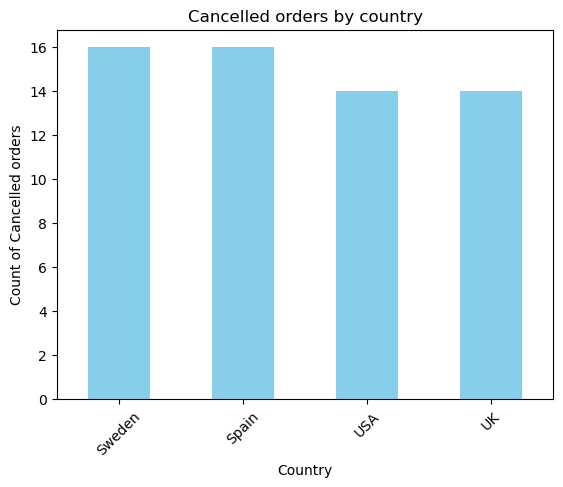

In [95]:
cancelled_by_country.plot(kind='bar', color='skyblue')
plt.title('Cancelled orders by country')
plt.xlabel('Country')
plt.ylabel('Count of Cancelled orders')
plt.xticks(rotation=45)
plt.show()

In [ ]:
#adding deal sizes to plot

In [96]:
deal_size_cancelled = cancelled_orders['DEALSIZE'].value_counts()

In [97]:
deal_size_cancelled

DEALSIZE
Medium    33
Small     27
Name: count, dtype: int64

In [98]:
deal_size_data = deal_size_cancelled.reset_index()

In [99]:
deal_size_data.columns = ['DEALSIZE', 'COUNT']

In [101]:
cancelled_by_country = cancelled_by_country.reset_index()

In [102]:
cancelled_by_country.columns = ['COUNTRY', 'COUNT']

In [104]:
cancelled_by_country

,COUNTRY,COUNT
0,Sweden,16
1,Spain,16
2,USA,14
3,UK,14


In [105]:
deal_size_data

,DEALSIZE,COUNT
0,Medium,33
1,Small,27


In [107]:
cancelled_by_country_dealsize = cancelled_orders[cancelled_orders['STATUS']=="Cancelled"].groupby(['COUNTRY','DEALSIZE']).size().reset_index(name='COUNT')

In [108]:
cancelled_by_country_dealsize

,COUNTRY,DEALSIZE,COUNT
0,Spain,Medium,8
1,Spain,Small,8
2,Sweden,Medium,8
3,Sweden,Small,8
4,UK,Medium,9
5,UK,Small,5
6,USA,Medium,8
7,USA,Small,6


In [111]:
sns.set(style='whitegrid')

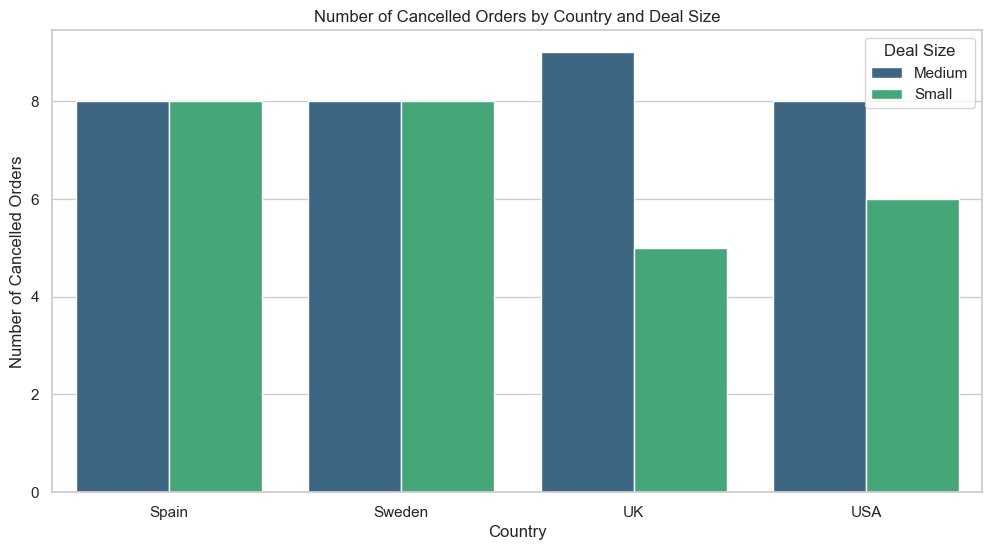

In [113]:
plt.figure(figsize=(12,6))
barplot = sns.barplot(x='COUNTRY', y='COUNT', hue='DEALSIZE', data=cancelled_by_country_dealsize, palette='viridis')

plt.xlabel("Country")
plt.ylabel('Number of Cancelled Orders')
plt.title('Number of Cancelled Orders by Country and Deal Size')
plt.legend(title='Deal Size', loc='upper right')


In [114]:
#Distribution of Canceled Orders by Country:
#United Kingdom (UK): Recorded the highest number of canceled orders, with a total of 14 orders. Among these, 9 were for Medium-sized transactions, and 5 were for Small-sized transactions.
#Spain and Sweden: Both countries have an equal number of canceled orders totaling 16, with each order split between Medium and Small sizes.
#USA: Recorded 14 canceled orders, with an equal distribution between Medium (8) and Small (6) sizes.

## Finding insights about orders that have been succesfully shipped

In [115]:
shipped_data = data[data['STATUS']=='Shipped']
shipped_data.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,PHONE,ADDRESSLINE1,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,2125557818,897 Long Airport Avenue,NYC,NY,10022,USA,AMER,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,05.07.2003 00:00,Shipped,2,5,2003,...,26.47.1555,59 rue de l'Abbaye,Reims,Reims,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,07.01.2003 00:00,Shipped,3,7,2003,...,+33 1 46 62 7555,27 rue du Colonel Pierre Avia,Paris,Paris,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,6265557265,78934 Hillside Dr.,Pasadena,CA,90003,USA,AMER,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10.10.2003 00:00,Shipped,4,10,2003,...,6505551386,7734 Strong St.,San Francisco,CA,NaN,USA,AMER,Brown,Julie,Medium


In [116]:
shipped_summary = shipped_data.groupby(['COUNTRY', 'DEALSIZE']).size().reset_index(name='COUNT')

In [117]:
shipped_summary.head()

,COUNTRY,DEALSIZE,COUNT
0,Australia,Large,7
1,Australia,Medium,77
2,Australia,Small,83
3,Austria,Large,4
4,Austria,Medium,24


In [118]:
sns.set(style='whitegrid')

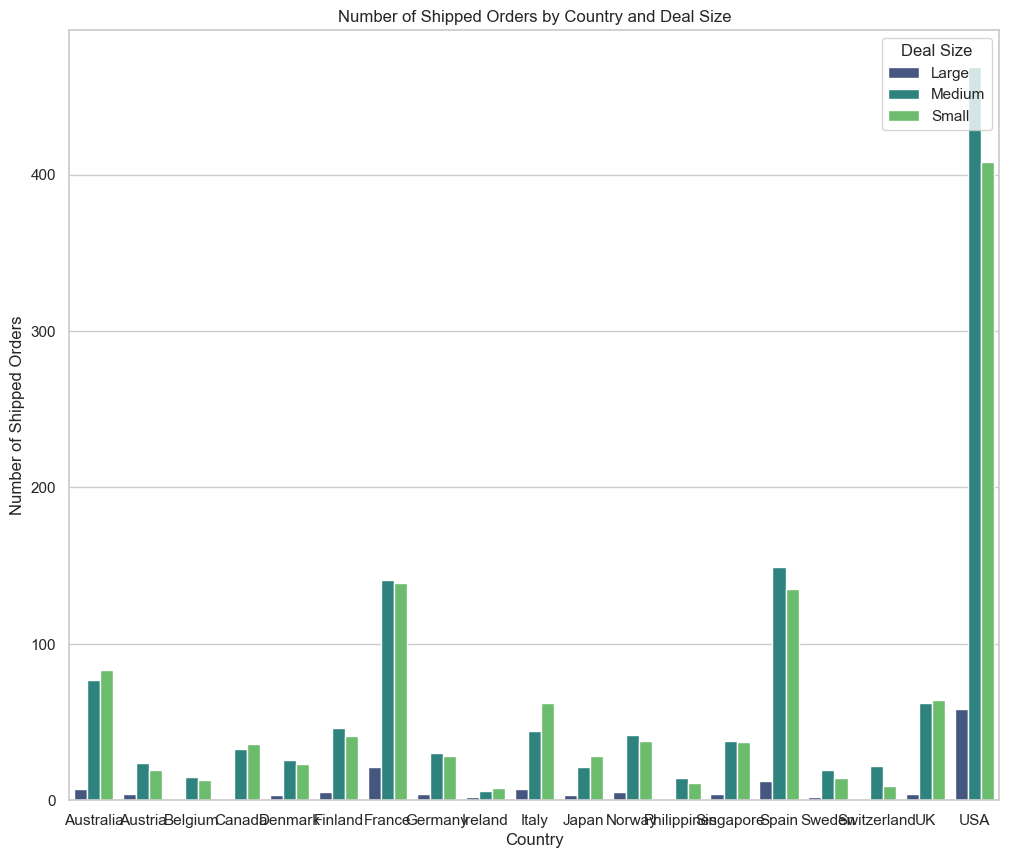

In [120]:
plt.figure(figsize=(12,10))
barplot = sns.barplot(x='COUNTRY', y='COUNT', hue='DEALSIZE', data=shipped_summary, palette='viridis')

plt.xlabel('Country')
plt.ylabel('Number of Shipped Orders')
plt.title('Number of Shipped Orders by Country and Deal Size')
plt.legend(title='Deal Size', loc='upper right')

In [123]:
data.head()


,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,PHONE,ADDRESSLINE1,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,2125557818,897 Long Airport Avenue,NYC,NY,10022,USA,AMER,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,05.07.2003 00:00,Shipped,2,5,2003,...,26.47.1555,59 rue de l'Abbaye,Reims,Reims,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,07.01.2003 00:00,Shipped,3,7,2003,...,+33 1 46 62 7555,27 rue du Colonel Pierre Avia,Paris,Paris,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,6265557265,78934 Hillside Dr.,Pasadena,CA,90003,USA,AMER,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10.10.2003 00:00,Shipped,4,10,2003,...,6505551386,7734 Strong St.,San Francisco,CA,NaN,USA,AMER,Brown,Julie,Medium
